# Dealing With Credit Card Fraud Dataset:

**Notes: Credit Card fraud Dataset is a imbalanced dataset.**

**Our Goals**:
- Understanding our dataset and extract insights about that.
- Create a sup sample with an unbalanced dataset.
- Using different classifiers and deciding which one has a higher accuracy.

**Outlines**
1) Understanding our dataset.
2) Preprocessing.
3) Dealing with Imbalanced Datasets.
4) Testing.
5) concloution. 

#### 1- Understanding our dataset:

In [16]:
# importing librayes
import pandas as pd 
import numpy as np

from sklearn.manifold import TSNE
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

- Loading dataset:

In [56]:
df=pd.read_csv('train.csv')
val=pd.read_csv('val.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


- Data Inspection:

In [18]:
shap=df.shape
print(f'Number of training examples: {shap[0]} ')
print(f'Number of features: {shap[1]-1} ')

Number of training examples: 170884 
Number of features: 30 


In [19]:
clas=df['Class'].unique()
num_class=len(clas)
print(f'class of data: {clas} and num of class: {num_class}')

class of data: [0 1] and num of class: 2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


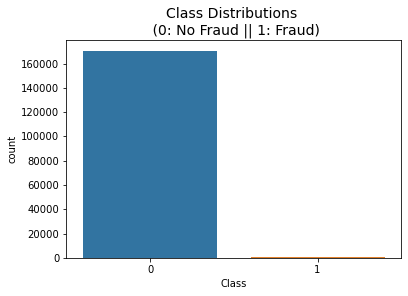

In [58]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [62]:
num_of_ones=len([x for x in df['Class'].values if x == 1])
print(f'Number of examples class 1 : {num_of_ones} ')
print(f'Number of examples class 0 : {df.shape[0]-num_of_ones} ')

Number of examples class 1 : 305 
Number of examples class 0 : 170579 


**Intuition about that:**
- We have implance dataset, num_of_1 = 305 , num_of_0 = 170579
- The Dataset is biased of negtive class.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,170884.0,94966.107886,47464.723773,0.000000,54348.000000,84923.500000,139404.000000,172792.000000
V1,170884.0,-0.001070,1.958944,-46.855047,-0.922071,0.016603,1.316250,2.451888
V2,170884.0,-0.000904,1.650481,-63.344698,-0.599127,0.065839,0.802518,22.057729
V3,170884.0,-0.002722,1.521820,-48.325589,-0.896376,0.177007,1.028302,4.226108
V4,170884.0,-0.002603,1.416490,-5.683171,-0.848978,-0.020895,0.738812,16.875344
V5,170884.0,0.000151,1.394123,-113.743307,-0.691840,-0.054185,0.612154,34.099309
V6,170884.0,0.000779,1.338331,-23.496714,-0.768986,-0.274228,0.400359,73.301626
V7,170884.0,-0.000811,1.260122,-43.557242,-0.554440,0.040417,0.569221,120.589494
V8,170884.0,-0.002327,1.208709,-73.216718,-0.209596,0.021461,0.326026,18.282168
V9,170884.0,-0.000622,1.098393,-13.434066,-0.642036,-0.051777,0.595095,10.392889


- Missing values:

In [66]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### Summary: 

- There are no "Null" values, so we don't have to work on ways to replace values.
- Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (.17%) of the time in the dataset.

#### 2- Preprocessing:

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,170884.0,94966.107886,47464.723773,0.000000,54348.000000,84923.500000,139404.000000,172792.000000
V1,170884.0,-0.001070,1.958944,-46.855047,-0.922071,0.016603,1.316250,2.451888
V2,170884.0,-0.000904,1.650481,-63.344698,-0.599127,0.065839,0.802518,22.057729
V3,170884.0,-0.002722,1.521820,-48.325589,-0.896376,0.177007,1.028302,4.226108
V4,170884.0,-0.002603,1.416490,-5.683171,-0.848978,-0.020895,0.738812,16.875344
V5,170884.0,0.000151,1.394123,-113.743307,-0.691840,-0.054185,0.612154,34.099309
V6,170884.0,0.000779,1.338331,-23.496714,-0.768986,-0.274228,0.400359,73.301626
V7,170884.0,-0.000811,1.260122,-43.557242,-0.554440,0.040417,0.569221,120.589494
V8,170884.0,-0.002327,1.208709,-73.216718,-0.209596,0.021461,0.326026,18.282168
V9,170884.0,-0.000622,1.098393,-13.434066,-0.642036,-0.051777,0.595095,10.392889


- Scaling data:
- All columns is scaling except Time and Amount.

In [67]:
from sklearn.preprocessing import  RobustScaler

# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

#traing dataset 
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# val dataset
val['scaled_amount'] = rob_scaler.transform(val['Amount'].values.reshape(-1,1))
val['scaled_time'] = rob_scaler.transform(val['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
val.drop(['Time','Amount'], axis=1, inplace=True)


In [68]:
# moving two columns to the first and second place.
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

scaled_amount_val= val['scaled_amount']
scaled_time_val= val['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
val.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

val.insert(0, 'scaled_amount', scaled_amount)
val.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.184551,0.402882,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,...,-0.269148,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,0
1,0.526714,-0.154880,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,...,-0.033806,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,0
2,6.091026,0.788345,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,...,0.509795,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,0
3,-0.239403,-0.343474,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,...,-0.096924,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,0
4,0.309530,-0.214794,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,...,0.011447,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,0


- Splitting target from the Data :

In [70]:
X = df.drop('Class',axis=1)
y=df['Class']

X_val=val.drop('Class',axis=1)
y_val=val['Class']


#### 3- Dealing with Imbalanced Datasets:

- Creating a sup sample (50/50) by Random under sample:

In [29]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

In [30]:
def under_sample(x, y, factor):
    counter = Counter(y)            
    minority_size = counter[1]  
    new_sz = int(minority_size * factor)
    #ratio of the number of samples in the majority(neg) class to the minority(pos) class
    rus = RandomUnderSampler(random_state=11, sampling_strategy={0:new_sz})
    X_resampled, y_resampled = rus.fit_resample(x, y)

    return X_resampled, y_resampled

In [31]:
def over_sample(x, y, factor):
    counter = Counter(y)            
    majoirty_size = counter[0]  
    new_sz = int(majoirty_size / factor)
    #ratio of the number of samples in the minority class to the majority class.
    ros = RandomOverSampler(random_state=11, sampling_strategy={1: new_sz})
    X_resampled, y_resampled = ros.fit_resample(x, y)


    return X_resampled, y_resampled

In [32]:
def smot_over_sample(x, y, factor):
    counter = Counter(y)            
    majoirty_size = counter[0]  
    new_sz = int(majoirty_size / factor)
    
    smote = SMOTE(random_state=11,sampling_strategy={1: new_sz},k_neighbors=5)
    X_resampled, y_resampled = smote.fit_resample(x, y)
    return X_resampled, y_resampled

In [71]:
# data under sample with 50 / 50
X_resampled, y_resampled=under_sample(X, y,1)
X_val_re, y_val_re=under_sample(X_val,y_val,1)

sup_sample=pd.concat([X_resampled,y_resampled],axis=1)
new_val=pd.concat([X_val_re,y_val_re],axis=1)

sup_sample=sup_sample.sample(frac=1)
new_val=new_val.sample(frac=1)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


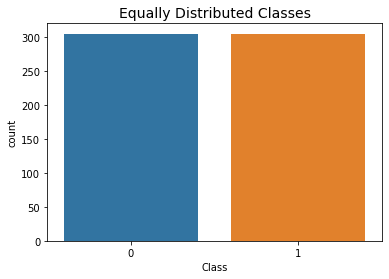

In [73]:
sns.countplot('Class',data=sup_sample)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

**Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss**

- Correlation Matrices:

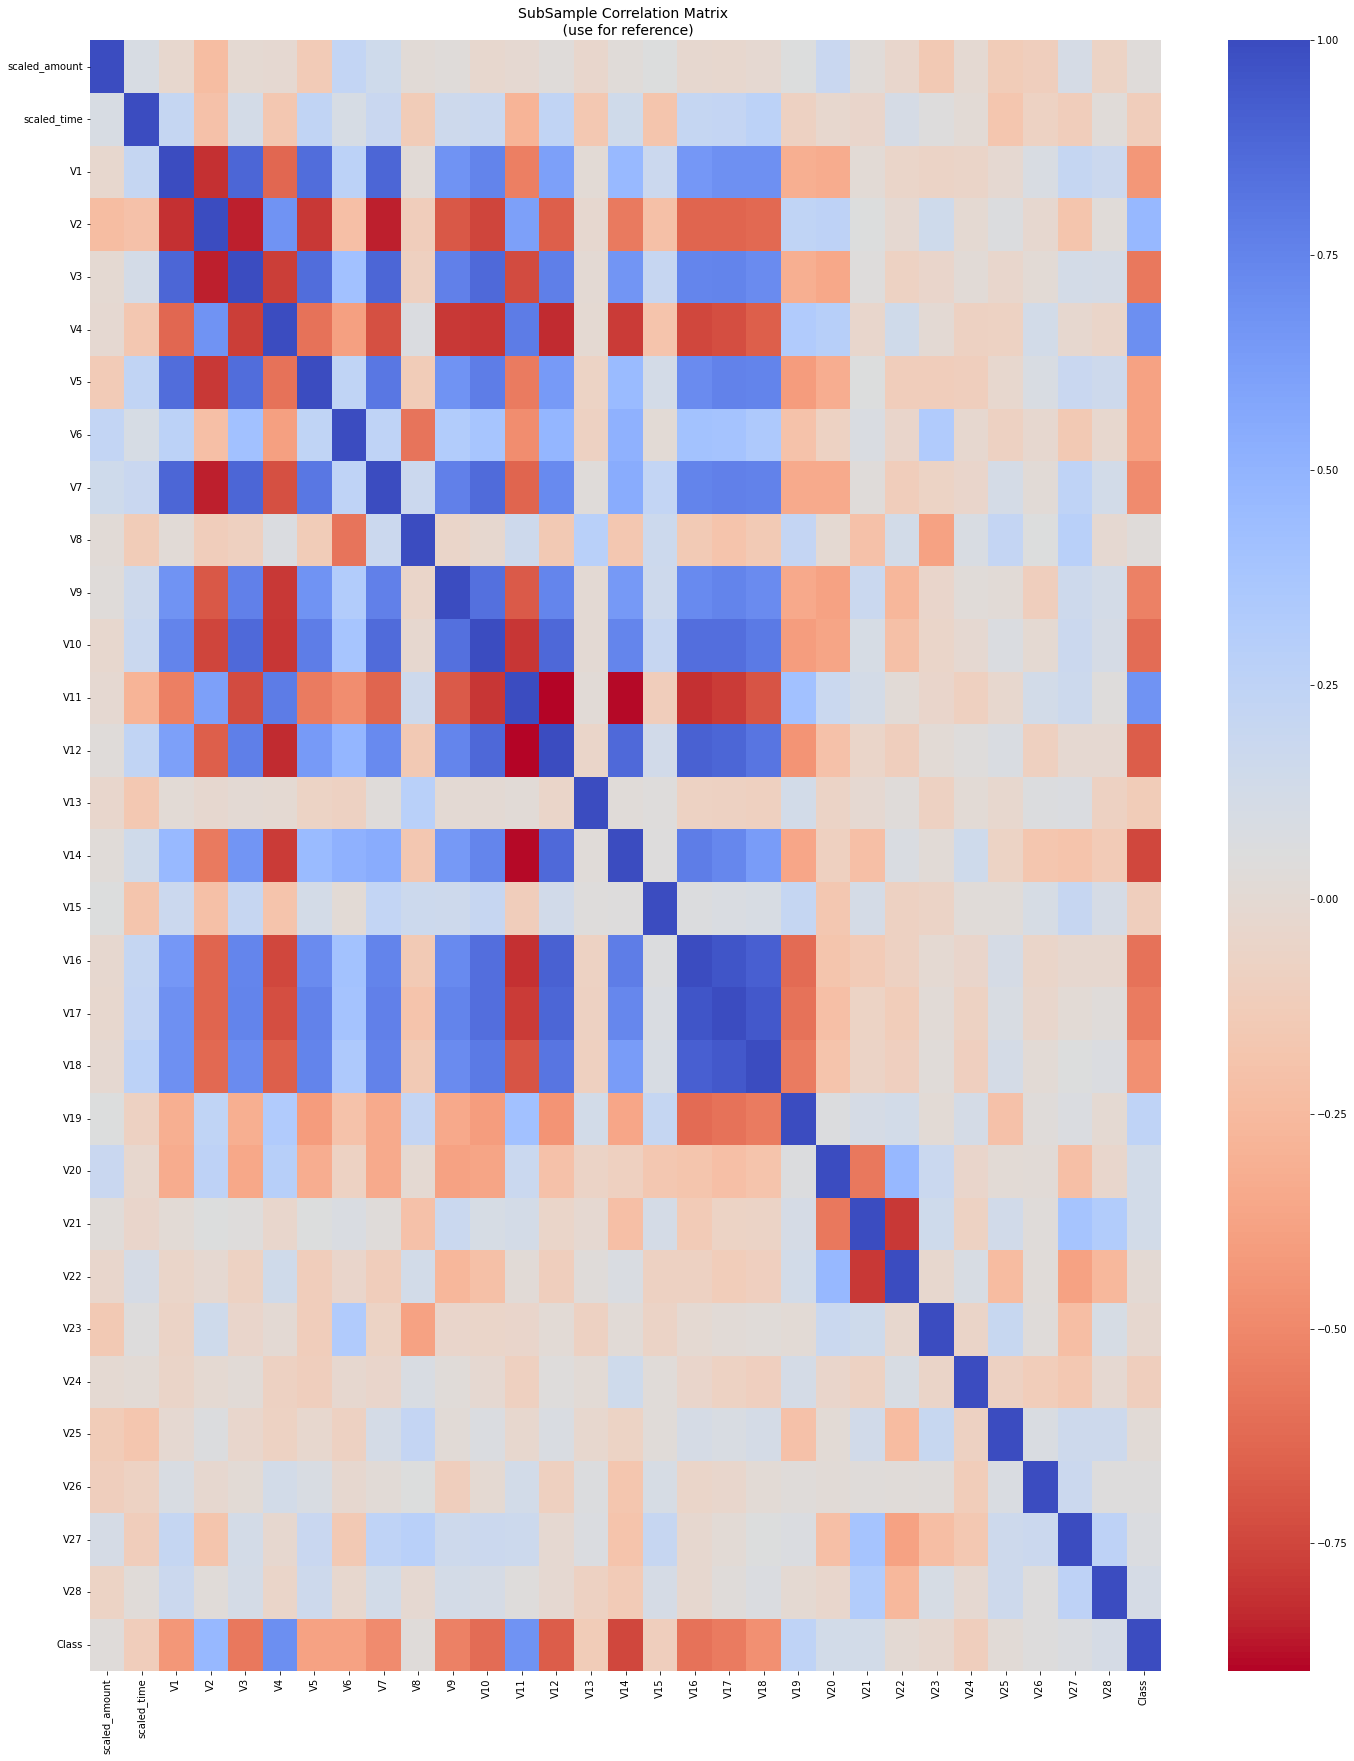

In [74]:
f, ax = plt.subplots(1, 1, figsize=(24,30))

sub_sample_corr = sup_sample.corr()
new_val_corr=new_val.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

- Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

- Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

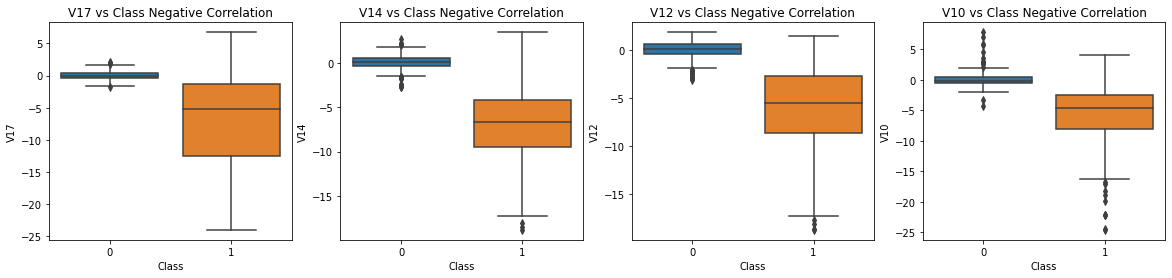

In [36]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=sup_sample, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=sup_sample, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=sup_sample,  ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=sup_sample, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

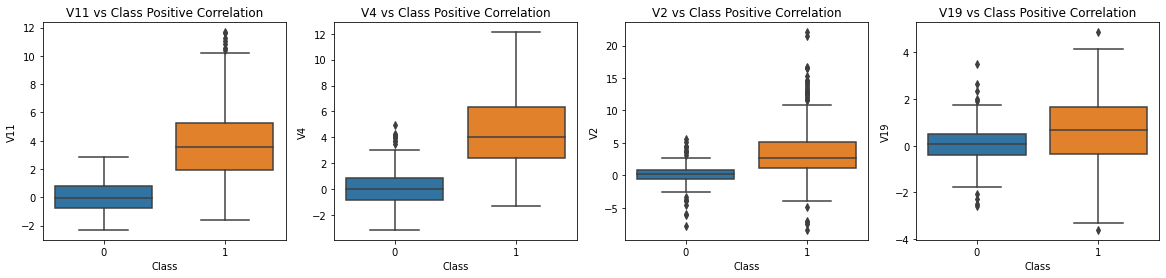

In [37]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=sup_sample, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=sup_sample, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=sup_sample, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=sup_sample, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

##### Anomaly Detection:
- We remove "extreme outliers" from features that have a high correlation with our classes. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

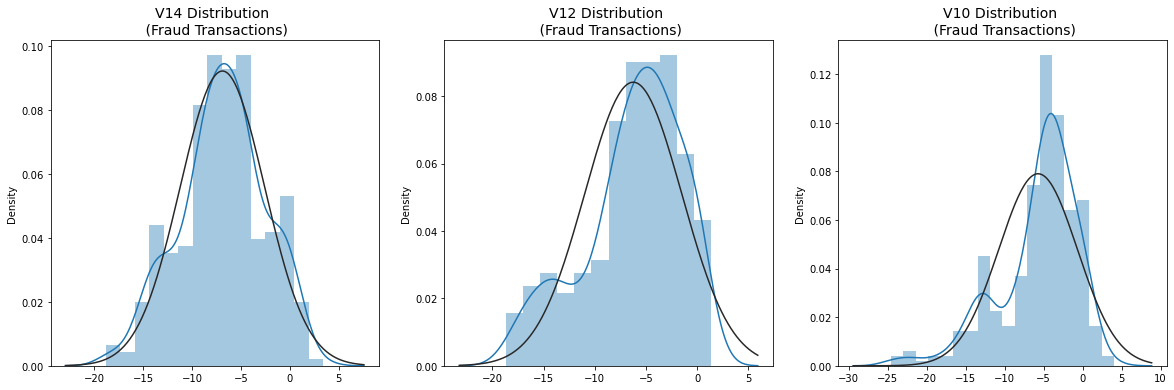

In [38]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = sup_sample['V14'].loc[sup_sample['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm)
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = sup_sample['V12'].loc[sup_sample['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm)
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = sup_sample['V10'].loc[sup_sample['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm)
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [75]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = sup_sample['V14'].loc[sup_sample['Class'] == 1].values

q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

sup_sample = sup_sample.drop(sup_sample[(sup_sample['V14'] > v14_upper) | (sup_sample['V14'] < v14_lower)].index)
new_val = new_val.drop(new_val[(new_val['V14'] > v14_upper) | (new_val['V14'] < v14_lower)].index)

print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = sup_sample['V12'].loc[sup_sample['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
sup_sample = sup_sample.drop(sup_sample[(sup_sample['V12'] > v12_upper) | (sup_sample['V12'] < v12_lower)].index)
new_val = new_val.drop(new_val[(new_val['V12'] > v12_upper) | (new_val['V12'] < v12_lower)].index)

print('Number of Instances after outliers removal: {}'.format(len(sup_sample)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = sup_sample['V10'].loc[sup_sample['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
sup_sample = sup_sample.drop(sup_sample[(sup_sample['V10'] > v10_upper) | (sup_sample['V10'] < v10_lower)].index)
new_val = new_val.drop(new_val[(new_val['V10'] > v10_upper) | (new_val['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(sup_sample)))

Quartile 25: -9.50514082568186 | Quartile 75: -4.22036591807154
iqr: 5.28477490761032
Cut Off: 7.92716236141548
V14 Lower: -17.43230318709734
V14 Upper: 3.70679644334394
Feature V14 Outliers for Fraud Cases: 3
V10 outliers:[-18.8220867423816, -18.4937733551053, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.101002705084518
V12 Upper: 5.82377443990525
V12 outliers: [-17.1829184301947, -18.0475965708216, -18.6837146333443, -17.1504052507291, -18.5536970096458]
Feature V12 Outliers for Fraud Cases: 5
Number of Instances after outliers removal: 602
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.740608385253045
V10 Upper: 5.106871708716115
V10 outliers: [-16.7460441053944, -22.1870885620

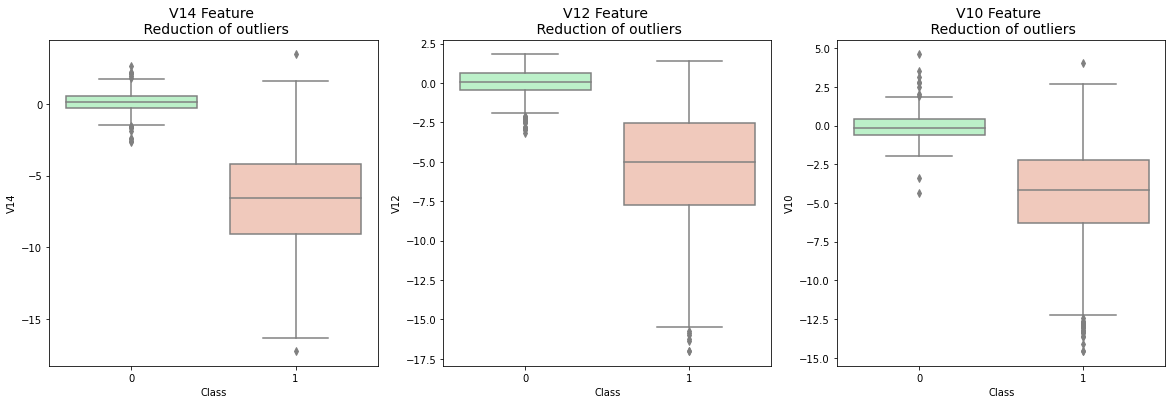

In [40]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=sup_sample,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=sup_sample, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=sup_sample, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)


plt.show()

- Classifiers:


In [76]:
X = sup_sample.drop('Class', axis=1)
y = sup_sample['Class']

X_val=new_val.drop('Class', axis=1)
y_val=new_val['Class']

In [43]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


In [47]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X, y)
    training_score = cross_val_score(classifier, X, y, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 92.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [48]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV



# Logistic Regression 
reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), reg_params)
grid_log_reg.fit(X, y)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X, y)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X, y)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X, y)

# tree best estimator
tree_clf = grid_tree.best_estimator_

C:\Users\omar gamel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\omar gamel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [77]:
from sklearn.metrics import f1_score,accuracy_score,classification_report

perdict_reg=log_reg.predict(X)
perdict_reg_test=log_reg.predict(X_val)

perdict_knear=knears_neighbors.predict(X)
perdict_knear_test=knears_neighbors.predict(X_val)

perdict_svc=svc.predict(X)
perdict_svc_test=svc.predict(X_val)

perdict_tree=tree_clf.predict(X)
perdict_tree_test=tree_clf.predict(X_val)

In [52]:
print(classification_report(y,perdict_reg))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       301
           1       1.00      0.87      0.93       279

    accuracy                           0.94       580
   macro avg       0.95      0.93      0.94       580
weighted avg       0.94      0.94      0.94       580



In [53]:
print(classification_report(y,perdict_knear))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       301
           1       0.98      0.91      0.95       279

    accuracy                           0.95       580
   macro avg       0.95      0.95      0.95       580
weighted avg       0.95      0.95      0.95       580



In [54]:
print(classification_report(y,perdict_svc))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       301
           1       1.00      0.87      0.93       279

    accuracy                           0.94       580
   macro avg       0.95      0.93      0.94       580
weighted avg       0.94      0.94      0.94       580



In [55]:
print(classification_report(y,perdict_tree))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       301
           1       1.00      0.90      0.95       279

    accuracy                           0.95       580
   macro avg       0.96      0.95      0.95       580
weighted avg       0.95      0.95      0.95       580



#### 4- Testing:

In [78]:
print(classification_report(y_val,perdict_reg_test))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        90
           1       0.99      0.87      0.92        82

    accuracy                           0.93       172
   macro avg       0.94      0.93      0.93       172
weighted avg       0.94      0.93      0.93       172



In [79]:
print(classification_report(y_val,perdict_knear_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        90
           1       0.99      0.89      0.94        82

    accuracy                           0.94       172
   macro avg       0.95      0.94      0.94       172
weighted avg       0.95      0.94      0.94       172



In [80]:
print(classification_report(y_val,perdict_svc_test))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        90
           1       0.99      0.87      0.92        82

    accuracy                           0.93       172
   macro avg       0.94      0.93      0.93       172
weighted avg       0.94      0.93      0.93       172



In [81]:
print(classification_report(y_val,perdict_tree_test))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        90
           1       0.99      0.87      0.92        82

    accuracy                           0.93       172
   macro avg       0.94      0.93      0.93       172
weighted avg       0.94      0.93      0.93       172



- Saving the best model as pkl file

In [82]:
import pickle

# 'model' is your trained scikit-learn model
# Save the model to a file named 'model.pkl'
with open('model.pkl', 'wb') as file:
    pickle.dump(knears_neighbors, file)


#### 5- concloution:

1) the best model is knears_neighbors has F1 score of traing .95 and val .94
2) when repairing an imbalanced dataset can you use under sample technique is very useful.